## Project Task: Week 1
### Data Exploration:
**1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:**

**• Glucose**

**• BloodPressure**

**• SkinThickness**

**• Insulin**

**• BMI**

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.2)

In [247]:
df = pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [248]:
cols_with_null_as_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_null_as_zero] = df[cols_with_null_as_zero].replace(0, np.NaN)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [250]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [251]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**2. Visually explore these variables using histograms. Treat the missing values accordingly.**

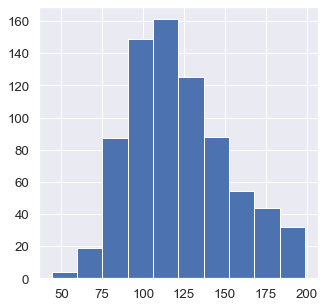

In [252]:
df['Glucose'].hist();

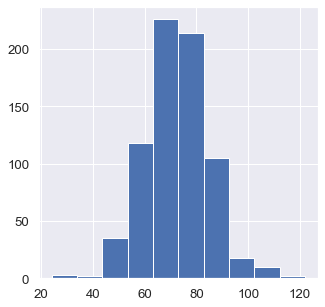

In [253]:
df['BloodPressure'].hist();

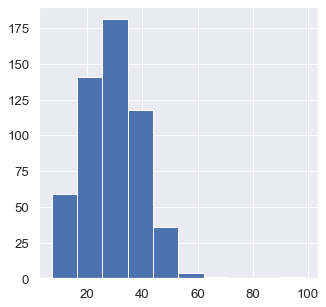

In [254]:
df['SkinThickness'].hist();

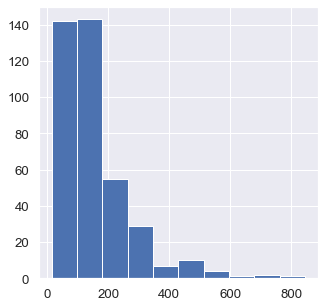

In [255]:
df['Insulin'].hist();

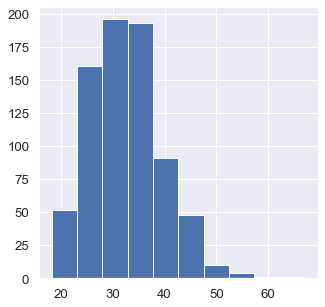

In [256]:
df['BMI'].hist();

From above histograms, it is clear that **Insulin** has highly skewed data distribution and remaining 4 variables have relatively balanced data distribution therefore we will treat missing values in these 5 variables as below:-
* Glucose              - replace missing values with mean of values.
* BloodPressure        - replace missing values with mean of values.
* SkinThickness        - replace missing values with mean of values.
* Insulin              - replace missing values with median of values.
* BMI                  - replace missing values with mean of values.

In [257]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [258]:
cols_mean_for_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[cols_mean_for_null] = df[cols_mean_for_null].fillna(df[cols_mean_for_null].mean())

**3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.**

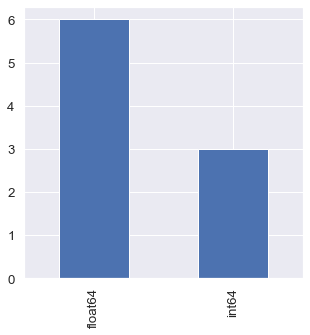

In [259]:
df.dtypes.value_counts().plot(kind='bar');

## Project Task: Week 2
### Data Exploration:
**1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.**

0    500
1    268
Name: Outcome, dtype: int64

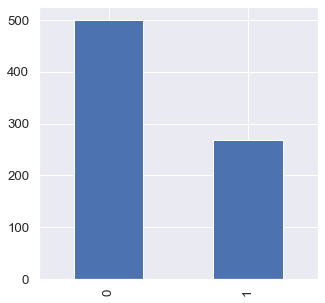

In [260]:
df['Outcome'].value_counts().plot(kind = 'bar')
df['Outcome'].value_counts()

Since classes in **Outcome** is little skewed so we will generate new samples using **SMOTE (Synthetic Minority Oversampling Technique)** for the class '**1**' which is under-represented in our data. We will use SMOTE out of many other techniques available since: 
* It generates new samples by interpolation.
* It doesn't duplicate data.

In [261]:
df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']
print(df_X.shape, df_y.shape)

(768, 8) (768,)


In [262]:
from imblearn.over_sampling import SMOTE

In [263]:
df_X_resampled, df_y_resampled = SMOTE(random_state=108).fit_resample(df_X, df_y)
print(df_X_resampled.shape, df_y_resampled.shape)

(1000, 8) (1000,)


1    500
0    500
Name: Outcome, dtype: int64

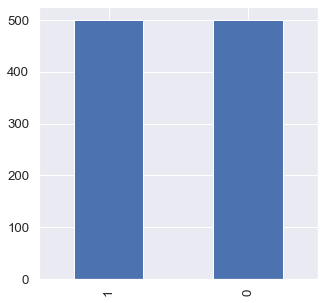

In [264]:
df_y_resampled.value_counts().plot(kind='bar')
df_y_resampled.value_counts()

**2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.**

In [265]:
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,3,164.686765,74.249021,29.153420,125.000000,42.767110,0.726091,29,1
996,0,138.913540,69.022720,27.713033,127.283849,39.177649,0.703702,24,1
997,10,131.497740,66.331574,33.149837,125.000000,45.820819,0.498032,38,1
998,0,105.571347,83.238205,29.153420,125.000000,27.728596,0.649204,60,1


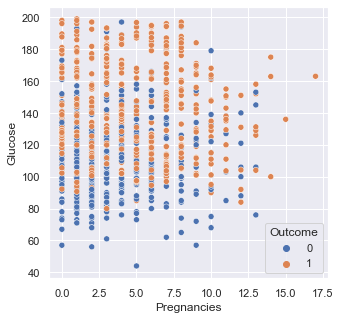

In [266]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x="Pregnancies", y="Glucose", data=df_resampled, hue="Outcome");

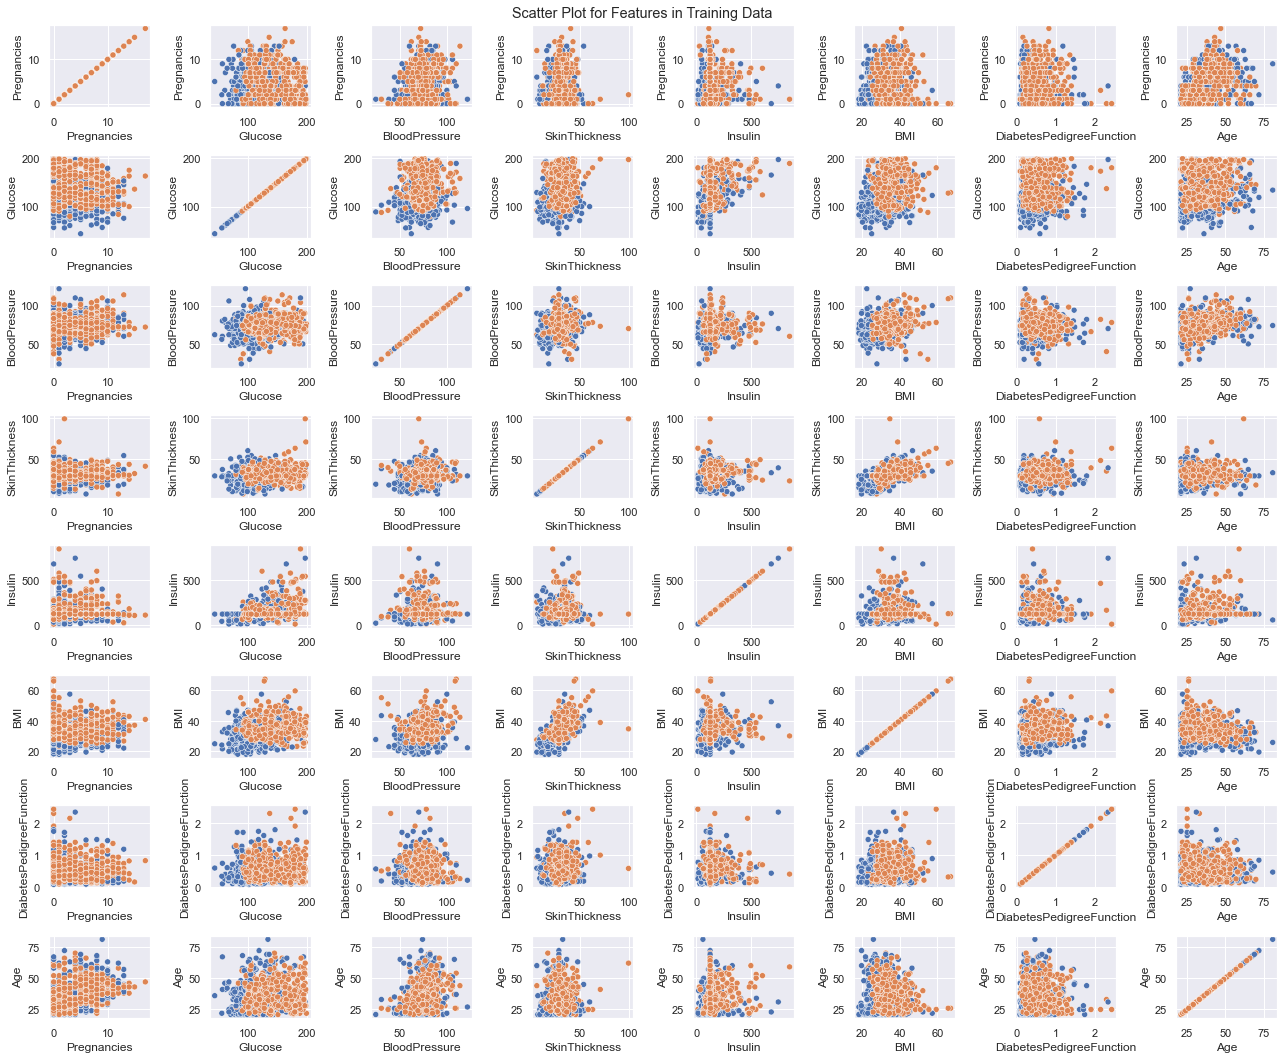

In [267]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Features in Training Data')

for i, col_y in enumerate(df_X_resampled.columns):
    for j, col_x in enumerate(df_X_resampled.columns):             
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=df_resampled, hue="Outcome", legend = False)

plt.tight_layout()

We have some interesting observations from above scatter plot of pairs of features:
* **Glucose** alone is impressively good to distinguish between the **Outcome** classes.
* **Age** alone is also able to distinguish between classes to some extent.
* It seems none of pairs in the dataset is able to clealry distinguish between the **Outcome** classes.
* We need to use combination of features to build model for prediction of classes in **Outcome**.

**3. Perform correlation analysis. Visually explore it using a heat map.**

In [268]:
df_X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.079953,0.205232,0.082752,0.009365,0.021006,-0.040210,0.532660
Glucose,0.079953,1.000000,0.200717,0.189776,0.418830,0.242501,0.138945,0.235522
BloodPressure,0.205232,0.200717,1.000000,0.176496,0.034861,0.277565,-0.005850,0.332015
SkinThickness,0.082752,0.189776,0.176496,1.000000,0.170719,0.538207,0.120799,0.117644
Insulin,0.009365,0.418830,0.034861,0.170719,1.000000,0.168702,0.115187,0.096940
BMI,0.021006,0.242501,0.277565,0.538207,0.168702,1.000000,0.177915,0.017529
DiabetesPedigreeFunction,-0.040210,0.138945,-0.005850,0.120799,0.115187,0.177915,1.000000,0.010532
Age,0.532660,0.235522,0.332015,0.117644,0.096940,0.017529,0.010532,1.000000


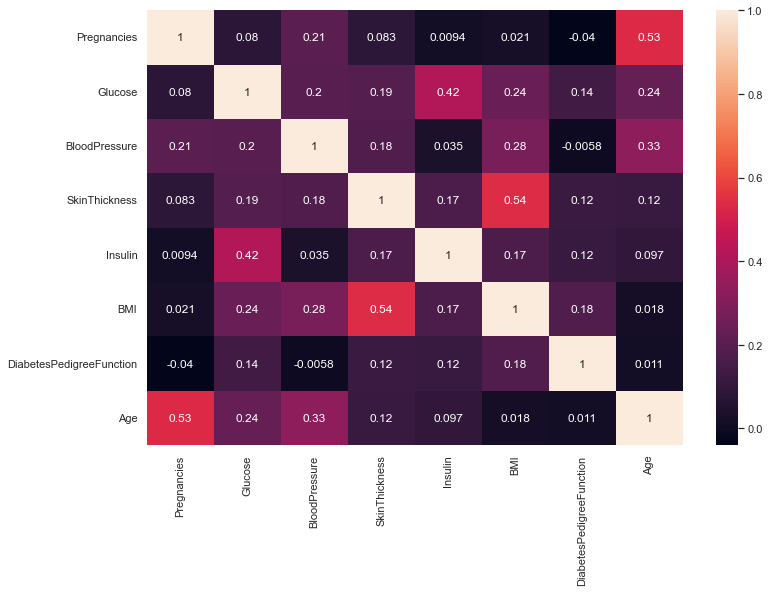

In [269]:
plt.figure(figsize=(12,8))
sns.heatmap(df_X_resampled.corr(), annot=True);

It appears from correlation matrix and heatmap that there exists significant correlation between some pairs such as -
* Age-Pregnancies
* BMI-SkinThickness

Also we can see that no pair of variables have negative correlation.

## Project Task: Week 3
### Data Modeling:
**1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.**

**Answer:** Since this is a classification problem, we will be building all popular classification models for our training data and then compare performance of each model on test data to accurately predict target variable (Outcome):

    1) Logistic Regression
    2) Decision Tree
    3) RandomForest Classifier
    4) K-Nearest Neighbour (KNN) 
    5) Support Vector Machine (SVM)
    6) Naive Bayes
    7) Ensemble Learning -> Boosting -> Adaptive Boosting
    8) Ensemble Learning -> Boosting -> Gradient Boosting (XGBClassifier)
    
We will use use **GridSearchCV** with Cross Validation (CV) = 5 for training and testing model which will give us insight about model performance on versatile data.  It helps to loop through predefined hyperparameters and fit model on training set.
GridSearchCV performs hyper parameter tuning which will give us optimal hyper parameters for each of the model. We will again train model with these optimized hyper parameters and then predict test data to get metrics for comparing all models.

#### Performing Train - Test split on input data (To train and test model without Cross Validation and Hyper Parameter Tuning):

In [270]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

In [271]:
X_train, X_test, y_train, y_test = train_test_split(df_X_resampled, df_y_resampled, test_size=0.15, random_state =10)
X_train.shape, X_test.shape

((850, 8), (150, 8))

**2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.**

In [272]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

#### 1) Logistic Regression:

In [273]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=300)
lr1.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [274]:
lr1.score(X_train,y_train)

0.7294117647058823

In [275]:
lr1.score(X_test, y_test)

0.76

**Performance evaluation and optimizing parameters using GridSearchCV:** Logistic regression does not really have any critical hyperparameters to tune. However we will try to optimize one of its parameters 'C' with the help of GridSearchCV. So we have set this parameter as a list of values form which GridSearchCV will select the best value of parameter.

In [276]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [277]:
parameters = {'C':np.logspace(-5, 5, 50)}

In [278]:
gs_lr = GridSearchCV(lr1, param_grid = parameters, cv=5, verbose=0)
gs_lr.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [279]:
gs_lr.best_params_

{'C': 8.286427728546842}

In [280]:
gs_lr.best_score_

0.738

In [281]:
lr2 = LogisticRegression(C=13.257113655901108, max_iter=300)
lr2.fit(X_train,y_train)

LogisticRegression(C=13.257113655901108, max_iter=300)

In [282]:
lr2.score(X_train,y_train)

0.7305882352941176

In [283]:
lr2.score(X_test, y_test)

0.7733333333333333

AUC: 0.884


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

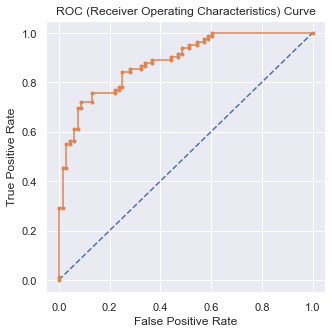

In [284]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = lr2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.790 auc_pr=0.908 ap=0.909


Text(0.5, 1.0, 'Precision-Recall Curve')

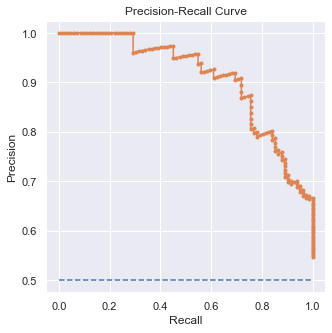

In [285]:
# Precision Recall Curve 

pred_y_test = lr2.predict(X_test)                                     # predict class values

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score

print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [286]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_lr)

#### 2) Decision Tree:

In [287]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=0)     
dt1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [288]:
dt1.score(X_train,y_train)           # Decision Tree always 100% accuracy over train data

1.0

In [289]:
dt1.score(X_test, y_test)

0.7733333333333333

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [290]:
parameters = {
    'max_depth':[1,2,3,4,5,None]
}

In [291]:
gs_dt = GridSearchCV(dt1, param_grid = parameters, cv=5, verbose=0)
gs_dt.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [292]:
gs_dt.best_params_

{'max_depth': 4}

In [293]:
gs_dt.best_score_

0.76

In [294]:
dt1.feature_importances_

array([0.06452226, 0.28556999, 0.06715314, 0.04979714, 0.07150365,
       0.20905992, 0.08573109, 0.16666279])

In [295]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Text(0.5, 1.0, 'Feature Importance in Model')

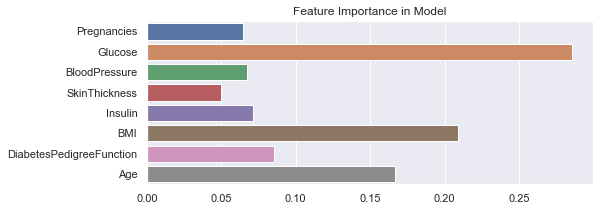

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=dt1.feature_importances_)
plt.title("Feature Importance in Model")

In [297]:
dt2 = DecisionTreeClassifier(max_depth=4)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [298]:
dt2.score(X_train,y_train)

0.8070588235294117

In [299]:
dt2.score(X_test, y_test)

0.82

AUC: 0.879


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

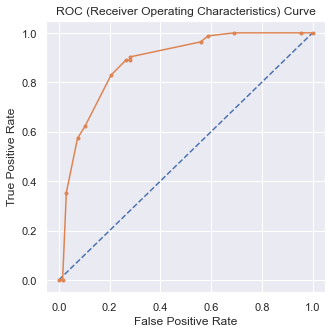

In [300]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = dt2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_dt)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.844 auc_pr=0.717 ap=0.868


Text(0.5, 1.0, 'Precision-Recall Curve')

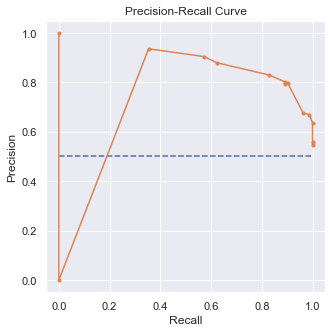

In [301]:
# Precision Recall Curve 

pred_y_test = dt2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [302]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

#### 3) RandomForest Classifier

In [303]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=0)
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [304]:
rf1.score(X_train, y_train)            # Random Forest also 100% accuracy over train data always

1.0

In [305]:
rf1.score(X_test, y_test)

0.8466666666666667

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [306]:
parameters = {
    'n_estimators': [50,100,150],
    'max_depth': [None,1,3,5,7],
    'min_samples_leaf': [1,3,5]
}

In [307]:
gs_dt = GridSearchCV(estimator=rf1, param_grid=parameters, cv=5, verbose=0)
gs_dt.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [308]:
gs_dt.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}

In [309]:
gs_dt.best_score_

0.813

In [310]:
rf1.feature_importances_

array([0.06264995, 0.24106573, 0.08653626, 0.08301549, 0.09945063,
       0.17678287, 0.11685244, 0.13364664])

Text(0.5, 1.0, 'Feature Importance in Model')

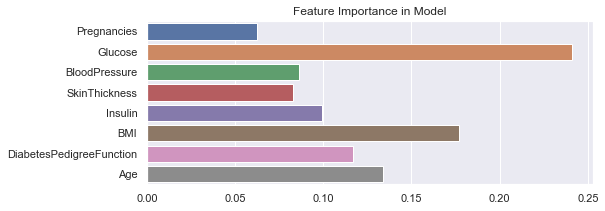

In [311]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=rf1.feature_importances_)
plt.title("Feature Importance in Model")

In [312]:
rf2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, n_estimators=100)
rf2.fit(X_train,y_train)

RandomForestClassifier()

In [313]:
rf2.score(X_train,y_train)

1.0

In [314]:
rf2.score(X_test, y_test)

0.86

AUC: 0.936


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

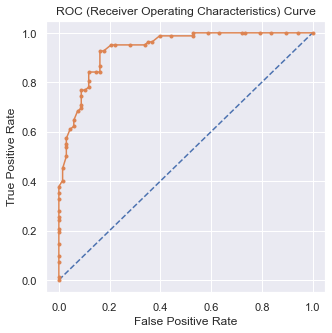

In [315]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = rf2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_rf)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.873 auc_pr=0.943 ap=0.942


Text(0.5, 1.0, 'Precision-Recall Curve')

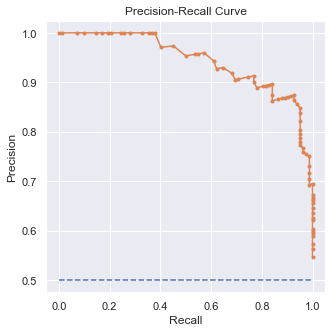

In [316]:
# Precision Recall Curve 

pred_y_test = rf2.predict(X_test)                                     # predict class values

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score

print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [317]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

#### 4) K-Nearest Neighbour (KNN) Classification:

In [318]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [319]:
knn1.score(X_train,y_train)

0.8835294117647059

In [320]:
knn1.score(X_test,y_test)

0.7866666666666666

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [321]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [322]:
gs_knn = GridSearchCV(estimator=knn1, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [323]:
gs_knn.best_params_

{'n_neighbors': 3}

In [324]:
gs_knn.best_score_

0.771

In [325]:
# gs_knn.cv_results_
gs_knn.cv_results_['mean_test_score']

array([0.76 , 0.771, 0.765, 0.757, 0.757, 0.739, 0.744, 0.746, 0.744,
       0.755, 0.751, 0.755, 0.754, 0.749])

Text(0.5, 1.0, 'Test Accuracy vs. N_Neighbors')

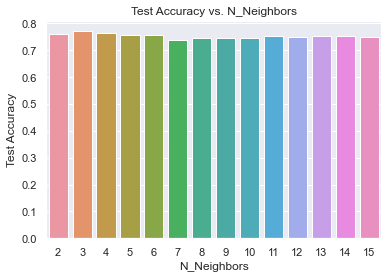

In [326]:
plt.figure(figsize=(6,4))
sns.barplot(x=knn_neighbors, y=gs_knn.cv_results_['mean_test_score'])
plt.xlabel("N_Neighbors")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. N_Neighbors")

In [327]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [328]:
knn2.score(X_train,y_train)

0.8835294117647059

In [329]:
knn2.score(X_test,y_test)

0.7866666666666666

AUC: 0.852


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

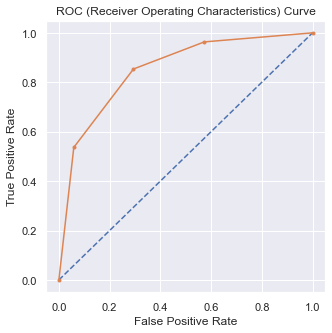

In [330]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.814 auc_pr=0.885 ap=0.832


Text(0.5, 1.0, 'Precision-Recall Curve')

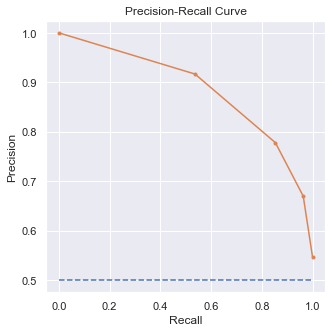

In [331]:
# Precision Recall Curve 

pred_y_test = knn2.predict(X_test)                                     # predict class values

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score

print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [332]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_knn)

#### 5) Support Vector Machine (SVM) Algorithm:

In [333]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf')
svm1.fit(X_train, y_train)

SVC()

In [334]:
svm1.score(X_train, y_train)

0.7282352941176471

In [335]:
svm1.score(X_test, y_test)

0.78

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [336]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [337]:
gs_svm = GridSearchCV(estimator=svm1, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [338]:
gs_svm.best_params_

{'C': 20, 'gamma': 0.005}

In [339]:
gs_svm.best_score_

0.8089999999999999

In [340]:
svm2 = SVC(kernel='rbf', C=20, gamma=0.005, probability=True)
svm2.fit(X_train, y_train)

SVC(C=20, gamma=0.005, probability=True)

In [341]:
svm2.score(X_train, y_train)

0.9941176470588236

In [342]:
svm2.score(X_test, y_test)

0.8133333333333334

AUC: 0.857


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

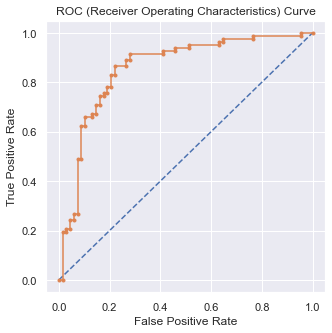

In [343]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = svm2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_svm)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.829 auc_pr=0.830 ap=0.837


Text(0.5, 1.0, 'Precision-Recall Curve')

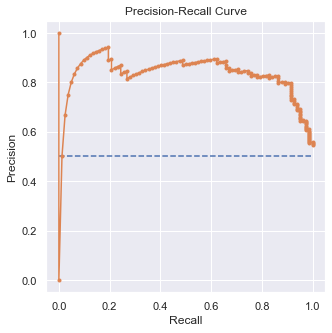

In [344]:
# Precision Recall Curve 

pred_y_test = svm2.predict(X_test)                                    # predict class values

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score

print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [345]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_svm)

#### 6) Naive Bayes Algorithm:

In [346]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [347]:
gnb.score(X_train, y_train)

0.7294117647058823

In [348]:
gnb.score(X_test, y_test)

0.8

**Naive Bayes has almost no hyperparameters to tune, so it usually generalizes well.**

AUC: 0.873


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

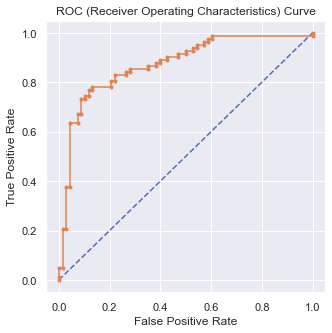

In [349]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = gnb.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_gnb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_gnb)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.819 auc_pr=0.879 ap=0.880


Text(0.5, 1.0, 'Precision-Recall Curve')

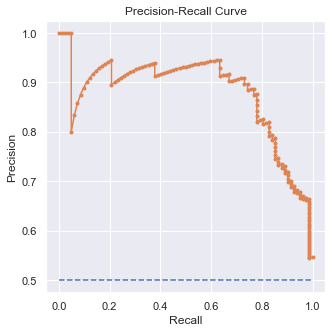

In [350]:
# Precision Recall Curve 

pred_y_test = gnb.predict(X_test)                                     # predict class values

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_gnb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score

print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_gnb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [351]:
models.append('GNB')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_gnb)

#### 7) Ensemble Learning --> Boosting --> Adaptive Boosting:

In [352]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(n_estimators=100)
ada1.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [353]:
ada1.score(X_train,y_train)  

0.8564705882352941

In [354]:
ada1.score(X_test, y_test)

0.7666666666666667

**Performance evaluation and optimizing parameters using cross_val_score:**

In [355]:
parameters = {'n_estimators': [100,200,300,400,500,700,1000]}

In [356]:
gs_ada = GridSearchCV(ada1, param_grid = parameters, cv=5, verbose=0)
gs_ada.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 700, 1000]})

In [357]:
gs_ada.best_params_

{'n_estimators': 500}

In [358]:
gs_ada.best_score_

0.785

In [359]:
ada1.feature_importances_

array([0.03, 0.16, 0.2 , 0.11, 0.16, 0.18, 0.11, 0.05])

Text(0.5, 1.0, 'Feature Importance in Model')

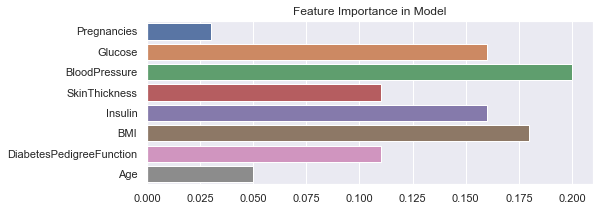

In [360]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=ada1.feature_importances_)
plt.title("Feature Importance in Model")

In [361]:
ada2 = AdaBoostClassifier(n_estimators=500)
ada2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500)

In [362]:
ada2.score(X_train,y_train)

0.9247058823529412

In [363]:
ada2.score(X_test, y_test)

0.7733333333333333

AUC: 0.850


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

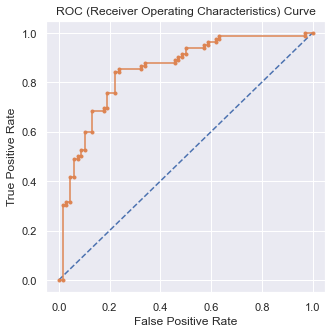

In [364]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = ada2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_ada = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_ada)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.785 auc_pr=0.838 ap=0.845


Text(0.5, 1.0, 'Precision-Recall Curve')

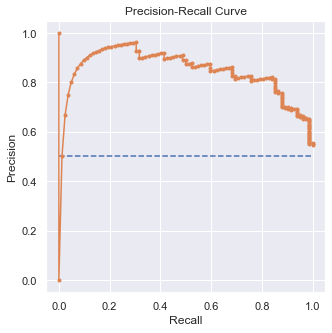

In [365]:
# Precision Recall Curve 

pred_y_test = ada2.predict(X_test)                                    # predict class values

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_ada_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score

print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_ada_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [366]:
models.append('ADA')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_ada)

#### 8) Ensemble Learning --> Boosting --> Gradient Boosting (XGBClassifier):

In [367]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', nthread=4, seed=10)
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=10, reg_alpha=0, ...)

In [368]:
xgb1.score(X_train, y_train) 

1.0

In [369]:
xgb1.score(X_test, y_test)

0.8266666666666667

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [370]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [371]:
gs_xgb = GridSearchCV(xgb1, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv=5, verbose=0)
gs_xgb.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4, nthread=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=10, reg_alpha=0, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc')

In [372]:
gs_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 180}

In [373]:
gs_xgb.best_score_

0.88522

In [374]:
xgb1.feature_importances_

array([0.09883169, 0.23199295, 0.09590793, 0.08073225, 0.10332596,
       0.15247221, 0.08829138, 0.1484456 ], dtype=float32)

Text(0.5, 1.0, 'Feature Importance in Model')

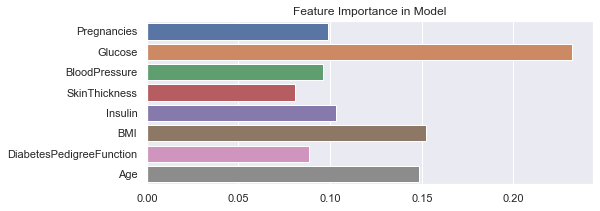

In [375]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=xgb1.feature_importances_)
plt.title("Feature Importance in Model")

In [376]:
xgb2 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', 
                    nthread=4, seed=10, learning_rate= 0.05, max_depth= 7, n_estimators= 180)
xgb2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=10, reg_alpha=0, ...)

In [377]:
xgb2.score(X_train,y_train)

0.9976470588235294

In [378]:
xgb2.score(X_test, y_test)

0.8066666666666666

AUC: 0.922


Text(0.5, 1.0, 'ROC (Receiver Operating Characteristics) Curve')

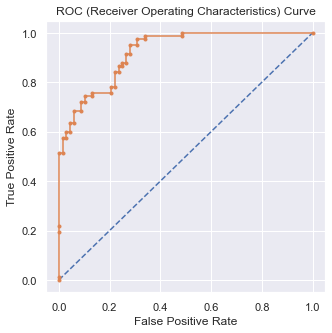

In [379]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = xgb2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_xgb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_xgb)

fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve")

f1=0.824 auc_pr=0.936 ap=0.937


Text(0.5, 1.0, 'Precision-Recall Curve')

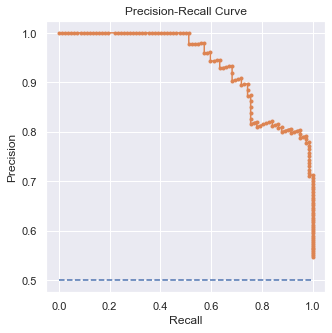

In [380]:
# Precision Recall Curve 

pred_y_test = xgb2.predict(X_test)                                     # predict class values

precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_xgb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score

print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_xgb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

In [381]:
models.append('XGB')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_xgb)

Text(0.5, 1.0, 'Comparison of Different Classification Algorithms')

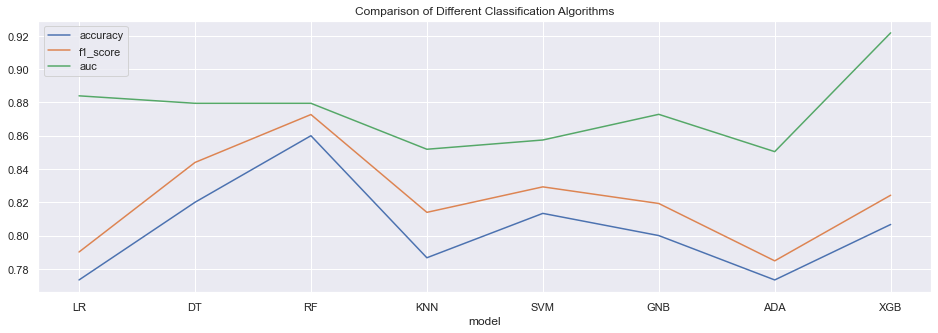

In [382]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms")

In [383]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.773333,0.790123,0.883967
DT,0.820000,0.843931,0.879484
RF,0.860000,0.872727,0.879484
KNN,0.786667,0.813953,0.851865
SVM,0.813333,0.829268,0.857425
GNB,0.800000,0.819277,0.872848
ADA,0.773333,0.784810,0.850430
XGB,0.806667,0.824242,0.921808


**Among all models, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.**

#### FINAL CLASSIFIER:

In [384]:
final_model = rf2

## Project Task: Week 4
### Data Modeling:
**1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.**

In [385]:
cr = classification_report(y_test, final_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        68
           1       0.87      0.88      0.87        82

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



In [386]:
confusion = confusion_matrix(y_test, final_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[57 11]
 [10 72]]


In [387]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     # also called recall
Specificity = TN/(TN+FP)

In [388]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.860
Precision: 0.867
Sensitivity: 0.878
Specificity: 0.838
AUC: 0.936


**Sensitivity and Specificity:** By changing the threshold, target classification will be changed hence the sensitivity and specificity will also be changed. Which one of these two we should maximize? What should be ideal threshold?

Ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off.
Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives. Sometimes we simply don’t want to compromise on sensitivity sometimes we don’t want to compromise on specificity. 

The threshold is set based on business problem. There are some cases where Sensitivity is important and need to be near to 1.
There are business cases where Specificity is important and need to be near to 1. We need to understand the business problem and decide the importance of Sensitivity and Specificity.

### Data Reporting:

**2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:**

    a. Pie chart to describe the diabetic or non-diabetic population
    b. Scatter charts between relevant variables to analyze the relationships
    c. Histogram or frequency charts to analyze the distribution of the data
    d. Heatmap of correlation analysis among the relevant variables
    e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

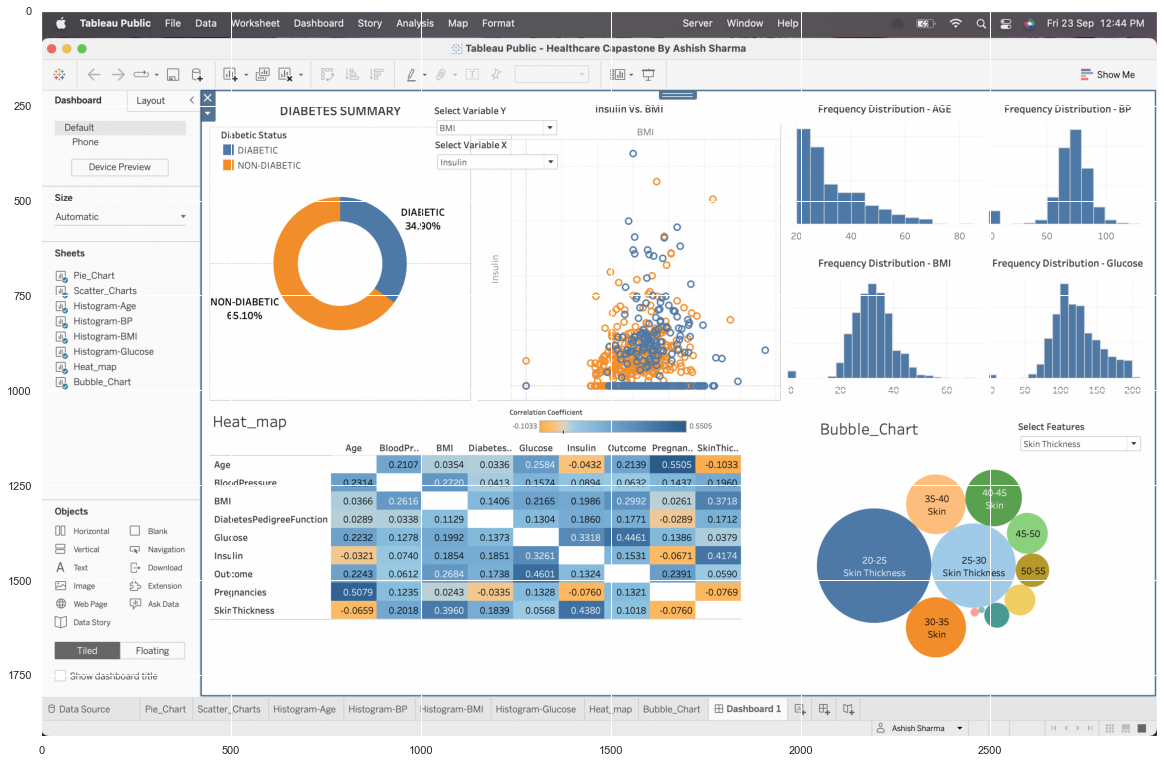

In [400]:
from matplotlib import image
plt.figure(figsize=(20,18))
img = image.imread("Healthcare Capstone.png") 
plt.imshow(img)
plt.show()